In [180]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 7)

# Scikit-Learn ≥ 1.0.1 is required
from packaging import version
import sklearn
print(sklearn.__version__)
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt

# import joblib
from joblib import dump, load

1.4.1.post1


In [181]:
solar = pd.read_csv("data/solar.csv")
solar.head()

,timestamp,kwh
0,2023-03-11 16:00:10.160454+01,0.54
1,2023-03-11 17:00:10.217795+01,1.02
2,2023-03-11 18:00:10.284064+01,1.17
3,2023-03-11 19:00:10.224836+01,1.18
4,2023-03-11 20:00:10.201847+01,1.18


In [182]:
sun = pd.read_excel("data/sunrise-sunset.xlsx")
sun.head()

,datum,Opkomst,Op ware middag,Ondergang
0,2023-01-01,08:45:00,12:46:00,16:47:00
1,2023-01-02,08:45:00,12:46:00,16:48:00
2,2023-01-03,08:45:00,12:47:00,16:49:00
3,2023-01-04,08:44:00,12:47:00,16:51:00
4,2023-01-05,08:44:00,12:48:00,16:52:00


In [183]:
weather = pd.read_csv("data/weather.csv")
weather.head()

,FID,the_geom,code,timestamp,precip_quantity,precip_range,temp,temp_min,temp_max,temp_grass_min,...,wind_speed_unit,wind_direction,wind_peak_speed,humidity_relative,weather_current,pressure,pressure_station_level,sun_duration_24hours,short_wave_from_sky_24hours,cloudiness
0,synop_data.6418.2023-03-01 09:00:00+00,POINT (51.347375 3.201846),6418,2023-03-01T09:00:00,NaN,NaN,4.9,NaN,NaN,NaN,...,1,50.0,9.4,54.3,NaN,1029.7,1028.0,NaN,NaN,0.0
1,synop_data.6414.2023-03-01 09:00:00+00,POINT (50.90398 3.121692),6414,2023-03-01T09:00:00,NaN,NaN,2.1,NaN,NaN,NaN,...,1,44.7,7.5,73.7,NaN,1029.3,1025.9,NaN,NaN,NaN
2,synop_data.6407.2023-03-01 09:00:00+00,POINT (51.200341 2.887306),6407,2023-03-01T09:00:00,NaN,NaN,3.3,NaN,NaN,NaN,...,1,60.0,7.0,NaN,NaN,1029.6,1029.0,NaN,NaN,1.0
3,synop_data.6434.2023-03-01 09:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T09:00:00,NaN,NaN,1.6,NaN,NaN,-10.0,...,1,71.6,5.9,70.9,NaN,1029.4,1027.3,NaN,NaN,NaN
4,synop_data.6434.2023-03-01 10:00:00+00,POINT (50.980293 3.816003),6434,2023-03-01T10:00:00,NaN,NaN,3.0,NaN,NaN,NaN,...,1,56.0,7.6,60.8,NaN,1028.8,1026.7,NaN,NaN,NaN


In [184]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39840 entries, 0 to 39839
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FID                          39840 non-null  object 
 1   the_geom                     39840 non-null  object 
 2   code                         39840 non-null  int64  
 3   timestamp                    39840 non-null  object 
 4   precip_quantity              6291 non-null   float64
 5   precip_range                 6417 non-null   float64
 6   temp                         39840 non-null  float64
 7   temp_min                     1660 non-null   float64
 8   temp_max                     1657 non-null   float64
 9   temp_grass_min               1189 non-null   float64
 10  wind_speed                   39827 non-null  float64
 11  wind_speed_unit              39840 non-null  int64  
 12  wind_direction               39414 non-null  float64
 13  wind_peak_speed 

In [185]:
print(len(weather))
weather = weather.groupby("timestamp").mean().reset_index()
print(len(weather))

39840
9960


C:\Users\jules\AppData\Local\Temp\ipykernel_25512\2263670035.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weather = weather.groupby("timestamp").mean().reset_index()


In [186]:
weather["timestamp"] = pd.to_datetime(weather["timestamp"], utc=True)
solar["timestamp"] = pd.to_datetime(solar["timestamp"], utc=True)
data = pd.merge_asof(solar, weather, on="timestamp", direction="nearest")

In [187]:
len(data)

9705

In [188]:
# drop columns with more than 70% missing values
data = data.dropna(thresh=0.3*len(weather), axis=1)
# drop useless columns
data.drop(columns=["code", "wind_speed_unit", "wind_direction", "pressure_station_level", "wind_peak_speed", "wind_speed"], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9705 entries, 0 to 9704
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   timestamp          9705 non-null   datetime64[ns, UTC]
 1   kwh                9705 non-null   float64            
 2   temp               9705 non-null   float64            
 3   humidity_relative  9705 non-null   float64            
 4   pressure           9705 non-null   float64            
 5   cloudiness         9705 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 530.7 KB


In [189]:
# clean weather timestamp data
data["timestamp"] = data["timestamp"].apply(lambda date: pd.to_datetime(date).strftime("%Y-%m-%d %H"))
# split timestamp into date and hour
data["date"] = data["timestamp"].apply(lambda date: date.split(" ")[0])
data["hour"] = data["timestamp"].apply(lambda date: date.split(" ")[1])
data.drop(columns=["timestamp"], inplace=True)
data.head()

,kwh,temp,humidity_relative,pressure,cloudiness,date,hour
0,0.54,6.85,54.833333,1012.025,6.0,2023-03-11,15
1,1.02,6.30,57.800000,1011.625,7.0,2023-03-11,16
2,1.17,5.95,60.366667,1011.500,7.0,2023-03-11,17
3,1.18,5.25,64.500000,1011.850,7.0,2023-03-11,18
4,1.18,4.85,68.633333,1011.650,7.0,2023-03-11,19


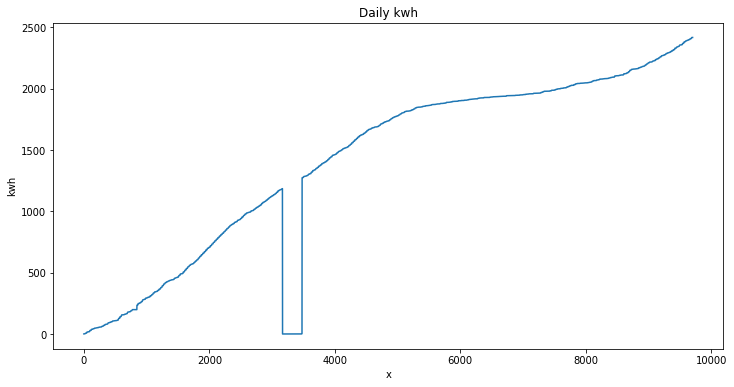

In [190]:
# plot kwh
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)), data["kwh"])
plt.xlabel("x")
plt.ylabel("kwh")
plt.title("Daily kwh")
plt.show()

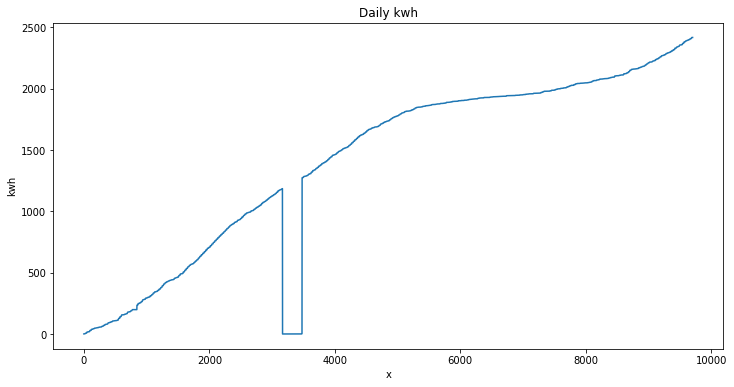

In [191]:
# plot kwh
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)), data["kwh"])
plt.xlabel("x")
plt.ylabel("kwh")
plt.title("Daily kwh")
plt.show()

In [192]:
# kwh is cummulative
# we need to calculate the daily kwh
data["kwh"] = data["kwh"] - data["kwh"].shift(1, fill_value=0)
data.head()

,kwh,temp,humidity_relative,pressure,cloudiness,date,hour
0,0.54,6.85,54.833333,1012.025,6.0,2023-03-11,15
1,0.48,6.30,57.800000,1011.625,7.0,2023-03-11,16
2,0.15,5.95,60.366667,1011.500,7.0,2023-03-11,17
3,0.01,5.25,64.500000,1011.850,7.0,2023-03-11,18
4,0.00,4.85,68.633333,1011.650,7.0,2023-03-11,19


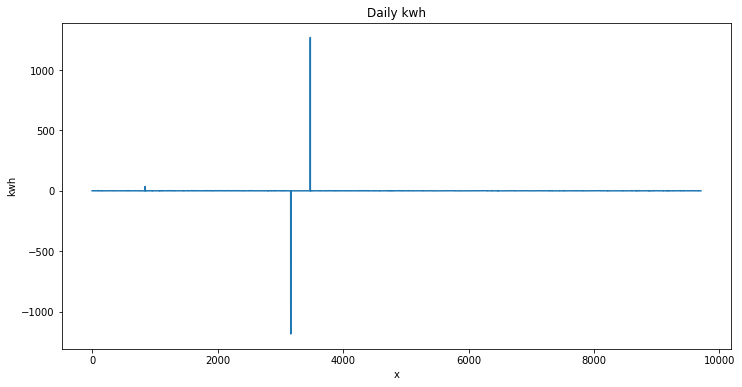

In [193]:
# plot kwh
plt.figure(figsize=(12, 6))
plt.plot(range(len(data)), data["kwh"])
plt.xlabel("x")
plt.ylabel("kwh")
plt.title("Daily kwh")
plt.show()

In [194]:
mean = data["kwh"].mean()
std = data["kwh"].std()
print(mean, std)

0.24909621844410093 17.642920080149064


In [195]:
print(len(data))
# remove outliers
data = data[abs(data["kwh"] - mean) < std]
print(len(data))
data.describe()

9705
9702


,kwh,temp,humidity_relative,pressure,cloudiness
count,9702.000000,9702.000000,9702.000000,9702.000000,9702.000000
mean,0.236701,12.022503,81.410386,1013.042862,5.449907
std,0.445524,5.664548,12.729167,11.859938,2.404182
min,0.000000,-4.650000,31.366667,967.800000,0.000000
25%,0.000000,8.350000,73.833333,1006.725000,3.500000
50%,0.000000,11.425000,84.716667,1014.900000,6.500000
75%,0.229925,16.200000,91.700000,1021.368750,7.000000
max,2.098000,30.975000,99.033333,1041.275000,8.000000


In [196]:
sun.rename(columns={"datum": "date", "Opkomst": "sunrise", "Op ware middag": "sun_noon", "Ondergang": "sunset"}, inplace=True)
# make date column a string
sun["date"] = sun["date"].apply(lambda date: date.strftime("%Y-%m-%d"))
sun.head()

,date,sunrise,sun_noon,sunset
0,2023-01-01,08:45:00,12:46:00,16:47:00
1,2023-01-02,08:45:00,12:46:00,16:48:00
2,2023-01-03,08:45:00,12:47:00,16:49:00
3,2023-01-04,08:44:00,12:47:00,16:51:00
4,2023-01-05,08:44:00,12:48:00,16:52:00


In [197]:
# change timestamps to difference in minutes from minimum timestamp
sun["sunrise"] = sun["sunrise"].apply(lambda time: time.hour * 60 + time.minute)
sunrise_min = sun["sunrise"].min()
sun["sunrise"] = sun["sunrise"] - sunrise_min

sun["sun_noon"] = sun["sun_noon"].apply(lambda time: time.hour * 60 + time.minute)
sun_noon_min = sun["sun_noon"].min()
sun["sun_noon"] = sun["sun_noon"] - sun_noon_min

sun["sunset"] = sun["sunset"].apply(lambda time: time.hour * 60 + time.minute)
sunset_min = sun["sunset"].min()
sun["sunset"] = sun["sunset"] - sunset_min
sun.head()

,date,sunrise,sun_noon,sunset
0,2023-01-01,196,20,10
1,2023-01-02,196,20,11
2,2023-01-03,196,21,12
3,2023-01-04,195,21,14
4,2023-01-05,195,22,15


In [198]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      731 non-null    object
 1   sunrise   731 non-null    int64 
 2   sun_noon  731 non-null    int64 
 3   sunset    731 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 23.0+ KB


In [199]:
# merge all data
data = data.merge(sun, on=["date"], how="inner")
print(data.shape)

(9702, 10)


In [200]:
# convert date to datetime
data["date"] = data["date"].astype("datetime64")
# add month and day columns
data["month"] = data["date"].dt.month
data["day"] = data["date"].dt.dayofweek
# drop date column
data.drop("date", axis=1, inplace=True)
# convert hour to int
data["hour"] = data["hour"].astype("int")

<Axes: >

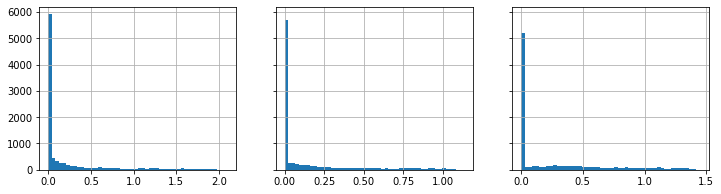

In [201]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
data["kwh"].hist(bins=50, ax=axs[0])
data["kwh"].apply(np.log1p).hist(bins=50, ax=axs[1])
data["kwh"].apply(np.sqrt).hist(bins=50, ax=axs[2])


In [202]:
X = data.drop("kwh", axis=1)
y = data["kwh"]

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
cm = data.corr()
cm["kwh"].sort_values(ascending=False).round(2)

kwh                  1.00
temp                 0.39
sunset               0.26
sun_noon             0.23
pressure             0.17
hour                 0.07
day                 -0.01
month               -0.05
sunrise             -0.25
cloudiness          -0.27
humidity_relative   -0.64
Name: kwh, dtype: float64

In [205]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7761 entries, 2145 to 7270
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               7761 non-null   float64
 1   humidity_relative  7761 non-null   float64
 2   pressure           7761 non-null   float64
 3   cloudiness         7761 non-null   float64
 4   hour               7761 non-null   int32  
 5   sunrise            7761 non-null   int64  
 6   sun_noon           7761 non-null   int64  
 7   sunset             7761 non-null   int64  
 8   month              7761 non-null   int64  
 9   day                7761 non-null   int64  
dtypes: float64(4), int32(1), int64(5)
memory usage: 636.6 KB


In [206]:
# make hour, month, day categorical
X_train["hour"] = X_train["hour"].astype("category")
X_train["month"] = X_train["month"].astype("category")
X_train["day"] = X_train["day"].astype("category")
X_train["cloudiness"] = X_train["cloudiness"].astype("category")

In [207]:
num_attribs = X_train.select_dtypes(include=np.number).columns
num_attribs

Index(['temp', 'humidity_relative', 'pressure', 'sunrise', 'sun_noon',
       'sunset'],
      dtype='object')

In [208]:
cat_attribs = X_train.select_dtypes(include="category").columns
cat_attribs

Index(['cloudiness', 'hour', 'month', 'day'], dtype='object')

In [209]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

# log_pipeline = Pipeline([
#     ("impute", SimpleImputer(strategy="median")),
#     ("log", FunctionTransformer(np.log, inverse_func=np.exp)),
#     ("standardize", StandardScaler())
# ])

cat_pipline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")), 
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipline, cat_attribs)
])

In [210]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

sqrt_transformer = FunctionTransformer(np.sqrt, inverse_func=np.square)

lin_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("lin_reg", TransformedTargetRegressor(LinearRegression(), transformer=sqrt_transformer))
])

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  Index(['temp', 'humidity_relative', 'pressure', 'sunrise', 'sun_noon',
       'sunset'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['cloudiness', 'hour', 'month', 'day'], dtype='object'))])),
                ('lin_reg',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=FunctionTransformer(func=<ufunc 'sqrt'>,
                                                                            inverse_func=<ufunc 'square'>)))])

In [211]:
# cross validation for linear regression
from sklearn.model_selection import cross_val_score

scores = -cross_val_score(lin_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
print("Linear Regression cross validation RMSE: ", scores.mean())

Linear Regression cross validation RMSE:  0.19402291014534404


In [212]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

y_test_pred = lin_reg.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Linear Regression RMSE on test set: ", rmse)
print("Linear Regression MAE on test set: ", mae)

Linear Regression RMSE on test set:  0.19972925223093846
Linear Regression MAE on test set:  0.10129520627535196


In [156]:
def plot_predictions(y_test, y_pred, size):
    plt.figure(figsize=(12, 6))
    size_range = range(size)
    plt.plot(size_range, y_test[:size], label="Actual")
    plt.plot(size_range, y_pred[:size], label="Predicted")
    plt.legend()
    plt.show()

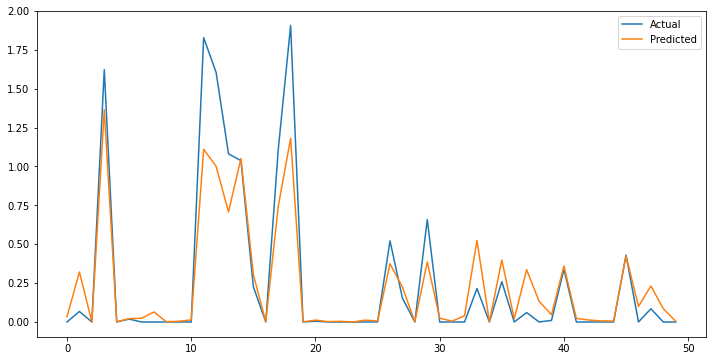

In [158]:
plot_predictions(y_test, y_test_pred, 50)

In [159]:
y_train_pred = lin_reg.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
print("Linear Regression RMSE on train set: ", rmse)
print("Linear Regression MAE on train set: ", mae)

Linear Regression RMSE on train set:  0.19425423424071883
Linear Regression MAE on train set:  0.10127955780500092


In [165]:
dump(lin_reg, "models/test/lin_reg.joblib")

['models/lin_reg.joblib']

- observation: not a lot of difference between RMSE on training set and test set => minimal to no overfitting

In [149]:
# Polynomial Regression with different degrees
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

degrees = [2, 3, 4, 5, 6, 7, 8]
best_score = np.inf
best_degree = 0
poly_regs = {}

for degree in degrees:
    new_num_pipeline = clone(num_pipeline)
    poly_features = PolynomialFeatures(degree=degree)
    new_num_pipeline.steps.append(["poly_features", poly_features])
    new_preprocessing = ColumnTransformer([
        ("num", new_num_pipeline, num_attribs),
        ("cat", cat_pipline, cat_attribs)
    ])
    poly_reg = Pipeline([
        ("preprocessing", new_preprocessing),
        ("lin_reg", TransformedTargetRegressor(LinearRegression(), transformer=sqrt_transformer))
    ])
    scores = -cross_val_score(poly_reg, X_train, y_train, scoring="neg_root_mean_squared_error", cv=5)
    print(f"Polynomial Regression degree {degree} cross validation RMSE: ", scores.mean())
    poly_reg.fit(X_train, y_train)
    poly_regs[f"poly_reg_{degree}"] = poly_reg
    y_train_pred = poly_reg.predict(X_train)
    rmse = root_mean_squared_error(y_train, y_train_pred)
    print(f"Polynomial Regression degree {degree} RMSE on training set: ", rmse)
    y_test_pred = poly_reg.predict(X_test)
    rmse = root_mean_squared_error(y_test, y_test_pred)
    print(f"Polynomial Regression degree {degree} RMSE on test set: ", rmse)
    if scores.mean() < best_score:
        best_score = scores.mean()
        best_degree = degree

print("Best degree for polynomial regression: ", best_degree)

Polynomial Regression degree 2 cross validation RMSE:  0.18940952632087854
Polynomial Regression degree 2 RMSE on training set:  0.18791612699164867
Polynomial Regression degree 2 RMSE on test set:  0.21009782036927568
Polynomial Regression degree 3 cross validation RMSE:  0.18187982411689216
Polynomial Regression degree 3 RMSE on training set:  0.1779894600835306
Polynomial Regression degree 3 RMSE on test set:  0.19808825007244082
Polynomial Regression degree 4 cross validation RMSE:  0.17832990694040743
Polynomial Regression degree 4 RMSE on training set:  0.17164226043079903
Polynomial Regression degree 4 RMSE on test set:  0.19207146039648731
Polynomial Regression degree 5 cross validation RMSE:  0.17680524537242284
Polynomial Regression degree 5 RMSE on training set:  0.15992386631351224
Polynomial Regression degree 5 RMSE on test set:  0.18229199561344422
Polynomial Regression degree 6 cross validation RMSE:  0.18764473494884845
Polynomial Regression degree 6 RMSE on training se

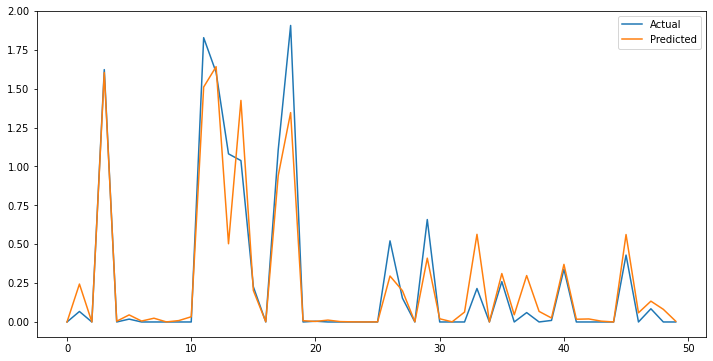

In [161]:
poly_reg = poly_regs[f"poly_reg_{best_degree}"]
plot_predictions(y_test, poly_reg.predict(X_test), 50)

In [164]:
dump(poly_reg, "models/test/poly_reg.joblib")

['models/poly_reg.joblib']

In [167]:
# Ridge and Lasso Regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

for degree in degrees:
    new_num_pipeline = clone(num_pipeline)
    poly_features = PolynomialFeatures(degree=degree)
    new_num_pipeline.steps.append(["poly_features", poly_features])
    new_preprocessing = ColumnTransformer([
        ("num", new_num_pipeline, num_attribs),
        ("cat", cat_pipline, cat_attribs)
    ])

    # Ridge
    ridge_reg = Pipeline([
        ("preprocessing", new_preprocessing),
        ("ridge_reg", TransformedTargetRegressor(Ridge(random_state=42), transformer=sqrt_transformer))
    ])
    param_grid_ridge = {
        "ridge_reg__regressor__alpha": [10**-5, 0.001, 0.1, 1]
    }
    grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5, scoring="neg_root_mean_squared_error")
    grid_search_ridge.fit(X_train, y_train)
    model = grid_search_ridge.best_estimator_
    x_train_pred = model.predict(X_train)
    rmse = root_mean_squared_error(y_train, x_train_pred)
    
    print(f"Ridge Regression degree {degree} best parameters: ", grid_search_ridge.best_params_)
    print(f"Ridge Regression degree {degree} best score: ", -grid_search_ridge.best_score_)
    print(f"Ridge Regression degree {degree} RMSE on training set: ", rmse)

    # # Lasso
    # lasso_reg = Pipeline([
    #     ("preprocessing", new_preprocessing),
    #     ("lasso_reg", TransformedTargetRegressor(Lasso(random_state=42, max_iter=10000), transformer=sqrt_transformer))
    # ])
    # param_grid_lasso = {
    #     "lasso_reg__regressor__alpha": [10**-5, 0.001, 0.1, 1]
    # }
    # grid_search_lasso = GridSearchCV(lasso_reg, param_grid_lasso, cv=5, scoring="neg_root_mean_squared_error")
    # grid_search_lasso.fit(X_train, y_train)
    # print(f"Lasso Regression degree {degree} best parameters: ", grid_search_lasso.best_params_)
    # print(f"Lasso Regression degree {degree} best score: ", -grid_search_lasso.best_score_)


Ridge Regression degree 2 best parameters:  {'ridge_reg__regressor__alpha': 1e-05}
Ridge Regression degree 2 best score:  0.1892318375030834
Ridge Regression degree 2 RMSE on training set:  0.1873277714707708
Ridge Regression degree 3 best parameters:  {'ridge_reg__regressor__alpha': 1e-05}
Ridge Regression degree 3 best score:  0.18183977148140826
Ridge Regression degree 3 RMSE on training set:  0.17806418211866132
Ridge Regression degree 4 best parameters:  {'ridge_reg__regressor__alpha': 1e-05}
Ridge Regression degree 4 best score:  0.1785617096652376
Ridge Regression degree 4 RMSE on training set:  0.17229174941730005
Ridge Regression degree 5 best parameters:  {'ridge_reg__regressor__alpha': 1e-05}
Ridge Regression degree 5 best score:  0.17830010624785744
Ridge Regression degree 5 RMSE on training set:  0.16357941425364053
Ridge Regression degree 6 best parameters:  {'ridge_reg__regressor__alpha': 0.1}
Ridge Regression degree 6 best score:  0.17764787042191138
Ridge Regression de

c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=7.78851e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.05522e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.48037e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.54628e-17): result may not be accurate.
  return linalg.solve

Ridge Regression degree 7 best parameters:  {'ridge_reg__regressor__alpha': 1e-05}
Ridge Regression degree 7 best score:  0.18527283585445203
Ridge Regression degree 7 RMSE on training set:  0.13333797315693988


c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.60969e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.87236e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.15007e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\jules\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=4.09912e-18): result may not be accurate.
  return linalg.solve

Ridge Regression degree 8 best parameters:  {'ridge_reg__regressor__alpha': 1}
Ridge Regression degree 8 best score:  0.37734030236129057
Ridge Regression degree 8 RMSE on training set:  0.14136046914976444


In [171]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("forest_reg", RandomForestRegressor(random_state=42))
])

param_grid = [
    {"forest_reg__n_estimators": [100, 200], "forest_reg__max_features": [10, 15, 20, 25]},
]
 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Random Forest best parameters: ", grid_search.best_params_)
print("Random Forest best score: ", -grid_search.best_score_)

Random Forest best parameters:  {'forest_reg__max_features': 20, 'forest_reg__n_estimators': 100}
Random Forest best score:  0.1684534565314618


In [172]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest_reg__max_features,param_forest_reg__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,7.446616,0.396798,0.048836,0.011338,20,100,"{'forest_reg__max_features': 20, 'forest_reg__...",-0.168834,-0.162311,-0.167460,-0.163920,-0.179742,-0.168453,0.006113,1
5,15.446879,2.327853,0.083934,0.006795,20,200,"{'forest_reg__max_features': 20, 'forest_reg__...",-0.168779,-0.163432,-0.167265,-0.164467,-0.180572,-0.168903,0.006140,2
7,16.094177,0.230109,0.078073,0.007368,25,200,"{'forest_reg__max_features': 25, 'forest_reg__...",-0.168784,-0.162334,-0.169201,-0.165398,-0.181687,-0.169481,0.006593,3
3,14.448750,0.928424,0.098614,0.030114,15,200,"{'forest_reg__max_features': 15, 'forest_reg__...",-0.171664,-0.164658,-0.165824,-0.166043,-0.182525,-0.170143,0.006651,4
6,8.104703,0.080246,0.043202,0.002785,25,100,"{'forest_reg__max_features': 25, 'forest_reg__...",-0.170468,-0.162587,-0.169707,-0.166277,-0.181832,-0.170174,0.006465,5


In [173]:
model = grid_search.best_estimator_
feature_importances = model["forest_reg"].feature_importances_
sorted(zip(feature_importances, model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.3401406331836373, 'num__humidity_relative'),
 (0.08518314619415251, 'num__temp'),
 (0.05919711394701866, 'cat__hour_12.0'),
 (0.053883139547869774, 'cat__hour_13.0'),
 (0.04966079152078073, 'cat__hour_11.0'),
 (0.046810794339570666, 'cat__hour_14.0'),
 (0.04105345194854742, 'num__sunset'),
 (0.03779451842193147, 'num__pressure'),
 (0.03297562565681174, 'num__sunrise'),
 (0.030490312221842376, 'cat__hour_10.0'),
 (0.028734163438349006, 'num__sun_noon'),
 (0.02532607393080195, 'cat__hour_15.0'),
 (0.0182827322684427, 'cat__hour_18.0'),
 (0.015079192352714153, 'cat__hour_16.0'),
 (0.014030406877940771, 'cat__hour_19.0'),
 (0.012721940097530542, 'cat__hour_9.0'),
 (0.010074039566244702, 'cat__hour_17.0'),
 (0.00808949148480006, 'cat__cloudiness_7.0'),
 (0.007879459786291947, 'cat__hour_20.0'),
 (0.0066020116333177494, 'cat__cloudiness_8.0'),
 (0.0058142407320126285, 'cat__month_5.0'),
 (0.004198473032865203, 'cat__cloudiness_7.5'),
 (0.0040426847307664686, 'cat__hour_8.0'),
 (0.0031758

In [176]:
y_test_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
print("Random Forest RMSE on test set: ", rmse)
print("Random Forest MAE on test set: ", mae)

Random Forest RMSE on test set:  0.17570944247525563
Random Forest MAE on test set:  0.08534867680851184


In [177]:
y_train_pred = model.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_pred)
print("Random Forest RMSE on training set: ", rmse)

Random Forest RMSE on training set:  0.06225230848934994


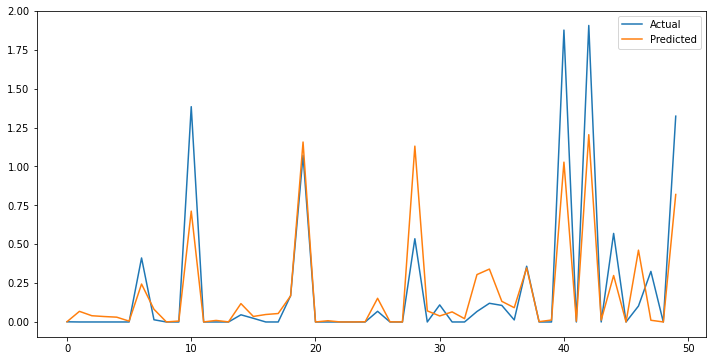

In [213]:
plot_predictions(y_test, y_test_pred, 50)

In [178]:
dump(model, "models/test/random_forest.joblib")

['models/test/random_forest.joblib']